# Data Exploration


Loading necessary libraries required for the project.

In [57]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score
#plt.style.use('ggplot')

                                                       
Loading the three data sets, 2022 SMD Hourly Data, 2021 SMD Hourly Data, 2020 SMD Hourly Data from New Hampshire (NH) spanning from 2020 to 2022.

In [58]:
import io
import os
from google.colab import drive
Directory = '/content/drive/My Drive/'
drive.mount('/content/drive')
xlsx_file = os.path.join(Directory,  '2020_smd_hourly.xlsx')
if os.path.exists(csv_file):
  hourly_data_2020_df = pd.read_excel(xlsx_file, sheet_name="NH")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
hourly_data_2020_df.head()

,Date,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,RT_CC,RT_MLC,Dry_Bulb,Dew_Point
0,2020-01-01,1,1045.2,1080.184,23.66,23.54,0.02,0.10,23.41,23.21,0.0,0.20,32,30
1,2020-01-01,2,1022.0,1034.726,18.84,18.75,0.02,0.07,18.65,18.54,0.0,0.11,34,27
2,2020-01-01,3,952.7,1005.343,16.68,16.67,0.01,0.00,17.73,17.65,0.0,0.08,34,26
3,2020-01-01,4,967.2,1000.609,16.57,16.55,0.01,0.01,17.24,17.16,0.0,0.08,33,24
4,2020-01-01,5,961.8,1011.067,15.62,15.61,0.01,0.00,17.19,17.11,0.0,0.08,31,24


In [60]:
xlsx_file_1 = os.path.join(Directory, '2021_smd_hourly.xlsx')
if os.path.exists(xlsx_file_1):
     hourly_data_2021_df = pd.read_excel(xlsx_file_1, sheet_name="NH")

In [61]:
hourly_data_2021_df.head()

,Date,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,RT_CC,RT_MLC,Dry_Bulb,Dew_Point
0,2021-01-01,1,1066.2,1142.187,24.53,24.24,0.20,0.09,26.58,26.53,0.00,0.05,26,18
1,2021-01-01,2,1025.1,1096.230,24.50,24.24,0.21,0.05,44.29,44.26,0.00,0.03,27,17
2,2021-01-01,3,982.5,1069.374,24.41,24.19,0.21,0.01,24.60,24.58,0.00,0.02,27,18
3,2021-01-01,4,988.8,1067.579,23.92,23.71,0.18,0.03,24.88,24.84,0.00,0.04,28,18
4,2021-01-01,5,986.4,1072.906,24.01,23.81,0.14,0.06,24.96,24.90,0.02,0.04,25,17


In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
xlsx_file_2 = os.path.join(Directory, '2022_smd_hourly.xlsx')
if os.path.exists(xlsx_file_2):
     hourly_data_2022_df = pd.read_excel(xlsx_file_2, sheet_name="NH") # Filter data for New Hampshire

In [64]:
hourly_data_2022_df.head()

,Date,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,RT_CC,RT_MLC,Dry_Bulb,Dew_Point
0,2022-01-01,1,1005.6,1042.181,32.93,32.35,0.10,0.48,26.38,25.95,0.0,0.43,34,34
1,2022-01-01,2,985.4,994.703,32.91,32.31,0.13,0.47,26.28,25.87,0.0,0.41,35,34
2,2022-01-01,3,930.9,964.326,31.31,30.85,0.00,0.46,27.94,27.50,0.0,0.44,35,35
3,2022-01-01,4,912.0,951.081,30.11,29.69,0.00,0.42,25.53,25.13,0.0,0.40,35,35
4,2022-01-01,5,917.7,953.029,31.33,30.86,0.00,0.47,29.76,29.27,0.0,0.49,36,34


In [65]:
hourly_data_2020_df = hourly_data_2020_df[['Date','Hr_End','Dry_Bulb','Dew_Point','RT_Demand']]

In [66]:
hourly_data_2021_df = hourly_data_2021_df[['Date','Hr_End','Dry_Bulb','Dew_Point','RT_Demand']]

In [67]:
hourly_data_2022_df = hourly_data_2022_df[['Date','Hr_End','Dry_Bulb','Dew_Point','RT_Demand']]

In [68]:
hourly_data_2020_df.head()

,Date,Hr_End,Dry_Bulb,Dew_Point,RT_Demand
0,2020-01-01,1,32,30,1080.184
1,2020-01-01,2,34,27,1034.726
2,2020-01-01,3,34,26,1005.343
3,2020-01-01,4,33,24,1000.609
4,2020-01-01,5,31,24,1011.067


In [69]:
hourly_data_2021_df.head()

,Date,Hr_End,Dry_Bulb,Dew_Point,RT_Demand
0,2021-01-01,1,26,18,1142.187
1,2021-01-01,2,27,17,1096.230
2,2021-01-01,3,27,18,1069.374
3,2021-01-01,4,28,18,1067.579
4,2021-01-01,5,25,17,1072.906


In [70]:
hourly_data_2022_df.head()

,Date,Hr_End,Dry_Bulb,Dew_Point,RT_Demand
0,2022-01-01,1,34,34,1042.181
1,2022-01-01,2,35,34,994.703
2,2022-01-01,3,35,35,964.326
3,2022-01-01,4,35,35,951.081
4,2022-01-01,5,36,34,953.029


Joining the three data frames into a single one

In [71]:
import pandas as pd
# Assuming you have three DataFrames: df_1, df_2, and df_3
# Concatenate them vertically
hourly_data_NH = pd.concat([hourly_data_2020_df, hourly_data_2021_df, hourly_data_2022_df], ignore_index=True)

In [72]:
hourly_data_NH.head()

,Date,Hr_End,Dry_Bulb,Dew_Point,RT_Demand
0,2020-01-01,1,32,30,1080.184
1,2020-01-01,2,34,27,1034.726
2,2020-01-01,3,34,26,1005.343
3,2020-01-01,4,33,24,1000.609
4,2020-01-01,5,31,24,1011.067


In [73]:
hourly_data_NH.tail()

,Date,Hr_End,Dry_Bulb,Dew_Point,RT_Demand
26299,2022-12-31,20,51,49,1282.789
26300,2022-12-31,21,50,48,1219.789
26301,2022-12-31,22,46,45,1158.510
26302,2022-12-31,23,45,44,1092.783
26303,2022-12-31,24,45,44,1032.948


Summary Statistics of the dataframe of Hourly load data.

In [74]:
hourly_data_NH.describe()

,Hr_End,Dry_Bulb,Dew_Point,RT_Demand
count,26304.000000,26304.000000,26304.000000,26304.000000
mean,12.500000,49.142868,37.412979,1295.402554
std,6.922318,19.677216,19.708705,262.760623
min,1.000000,-9.000000,-19.000000,769.478000
25%,6.750000,34.000000,23.000000,1110.889000
50%,12.500000,49.000000,37.000000,1276.953500
75%,18.250000,65.000000,55.000000,1449.707500
max,24.000000,97.000000,75.000000,2462.235000


Correlation between the variables

In [75]:
hourly_data_NH.corr()

<ipython-input-75-40f1b2252245>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hourly_data_NH.corr()


,Hr_End,Dry_Bulb,Dew_Point,RT_Demand
Hr_End,1.000000,0.174121,0.014022,0.430536
Dry_Bulb,0.174121,1.000000,0.878305,0.252229
Dew_Point,0.014022,0.878305,1.000000,0.117405
RT_Demand,0.430536,0.252229,0.117405,1.000000


# Plots

Scatterplots

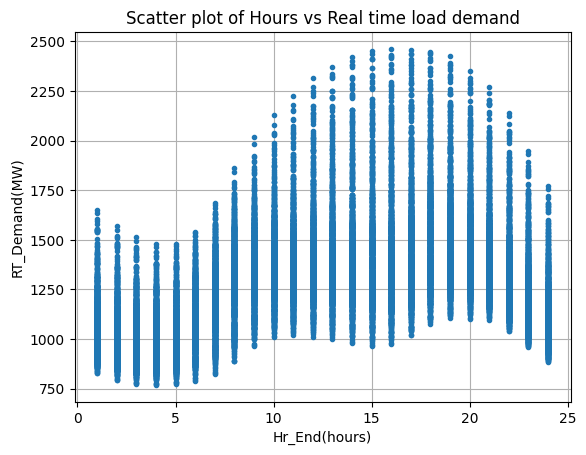

In [76]:
import matplotlib.pyplot as plt
from google.colab import files

fig = plt.figure()
plt.plot(hourly_data_NH['Hr_End'], hourly_data_NH['RT_Demand'], '.')
plt.xlabel('Hr_End(hours)')
plt.ylabel('RT_Demand(MW)')
plt.title('Scatter plot of Hours vs Real time load demand')
plt.grid(True)
plt.show()

The scatterplot shows a clear pattern in load, with higher load during the day and lower load during nights. This suggests that Hr_End is a useful predictor of load.

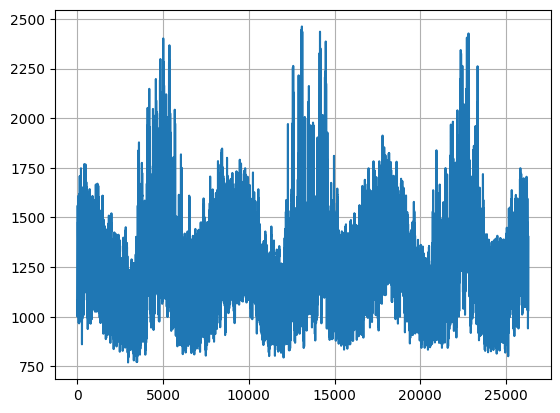

In [77]:
#Three years Seasonality
plt.plot(hourly_data_NH['RT_Demand'])
plt.grid(True)


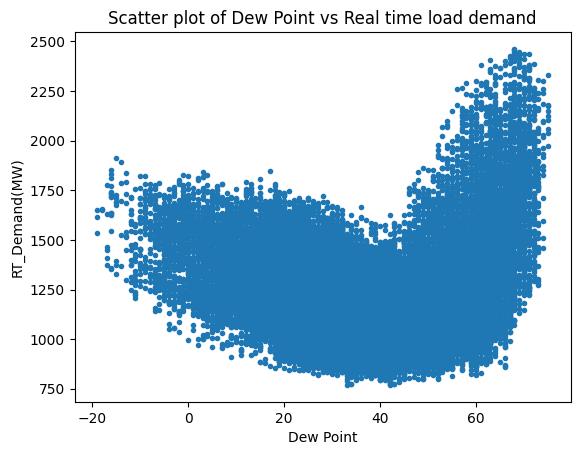

In [78]:
fig = plt.figure()
plt.plot(hourly_data_NH['Dew_Point'], hourly_data_NH['RT_Demand'], '.')
plt.xlabel('Dew Point')
plt.ylabel('RT_Demand(MW)')
plt.title('Scatter plot of Dew Point vs Real time load demand')
plt.show()

The scatterplot shows a positive correlation between Dew Point and load, because the temperature increases, there is an increase in load. To forcast load using Dew Point, we can introduce additional terms like quadratic term or cubic term to find out the non-linear relationship.

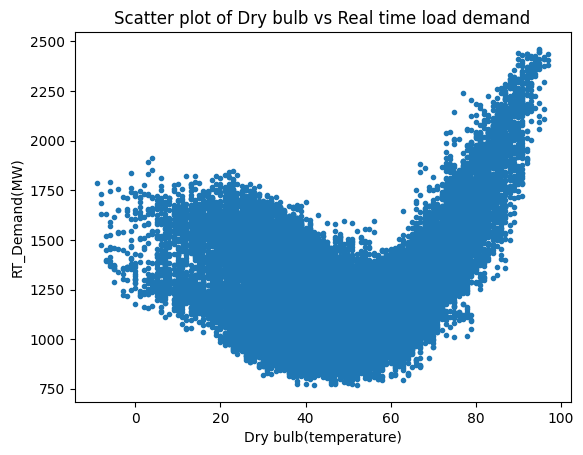

In [79]:
fig = plt.figure()
plt.plot(hourly_data_NH['Dry_Bulb'], hourly_data_NH['RT_Demand'], '.')
plt.xlabel('Dry bulb(temperature)')
plt.ylabel('RT_Demand(MW)')
plt.title('Scatter plot of Dry bulb vs Real time load demand')
plt.show()

The scatterplot shows a positive correlation between Dry bulb and load, because the temperature increases, there is an increase in load. To forcast load using Dry bulb, we can introduce additional terms like quadratic term or cubic term to find out the non-linear relationship.

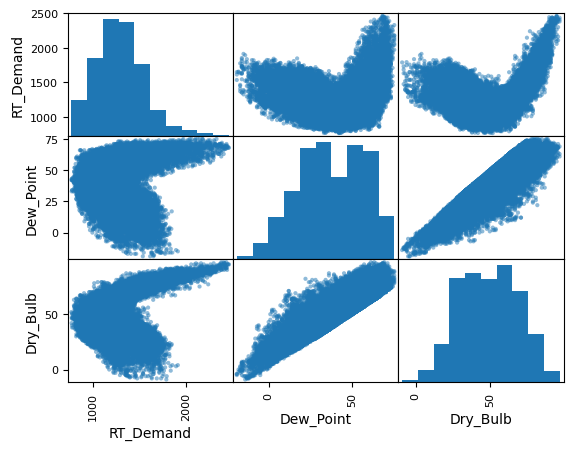

In [80]:
from pandas.plotting import scatter_matrix
features = ['RT_Demand','Dew_Point', 'Dry_Bulb']
pd.plotting.scatter_matrix(hourly_data_NH[features])
plt.show()

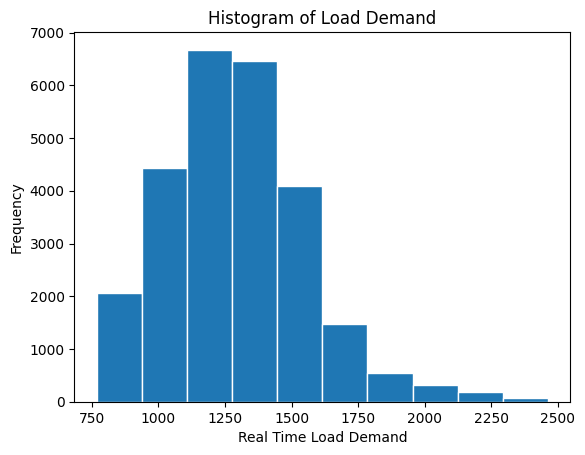

In [81]:
plt.hist(hourly_data_NH['RT_Demand'],edgecolor = "white")
plt.xlabel('Real Time Load Demand')
plt.ylabel('Frequency')
plt.title('Histogram of Load Demand')
plt.show()

As we examine the histogram, the load is right-skewed with long tail towards right.

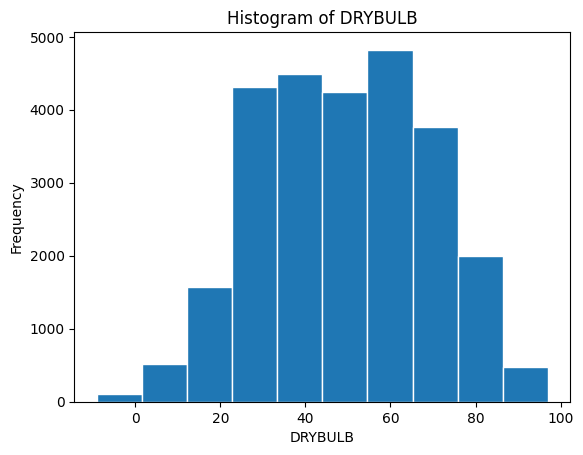

In [82]:
plt.hist(hourly_data_NH['Dry_Bulb'], edgecolor = "white")
plt.xlabel('DRYBULB')
plt.ylabel('Frequency')
plt.title('Histogram of DRYBULB')
plt.show()

As we examine the histogram, the distribution is approximately normal distribution.


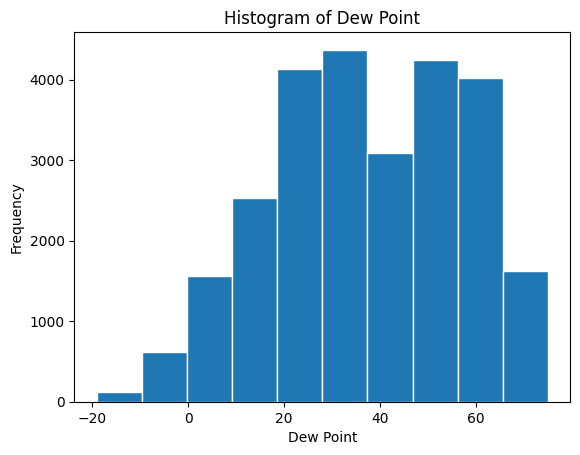

In [83]:
plt.hist(hourly_data_NH['Dew_Point'], edgecolor = "white")
plt.xlabel('Dew Point')
plt.ylabel('Frequency')
plt.title('Histogram of Dew Point')
plt.show()

As we examine the histogram, the distribution is left-Skewed

# Model Prediction
1. Residual plots
2. Test-train set.

In [84]:
#Use R-style model;
#Need to import a module

##Let's start with a SLR.
import statsmodels.api as sm
import statsmodels.formula.api as smf
mod1 = smf.ols(formula='RT_Demand ~ C(Hr_End) ', data=hourly_data_NH)

res1 = mod1.fit()

print(res1.summary())
print("1. R-squared:", res1.rsquared)
print("2. Adjusted R-squared:", res1.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:              RT_Demand   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     920.6
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:01:26   Log-Likelihood:            -1.7610e+05
No. Observations:               26304   AIC:                         3.522e+05
Df Residuals:                   26280   BIC:                         3.524e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1065.2853      5.909    1

In [85]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color='red')

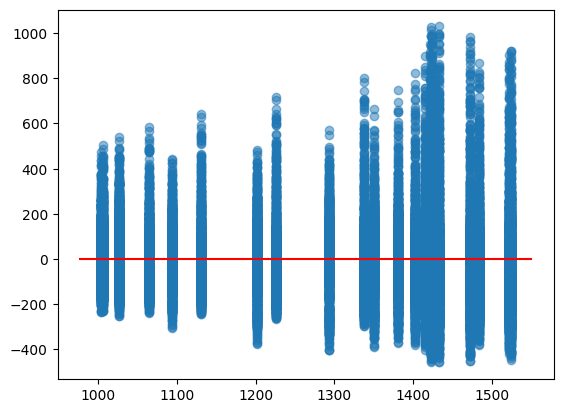

In [86]:
# Residual plot

plt.scatter(res1.fittedvalues, res1.resid, alpha=0.5)
abline(0,0)

                            OLS Regression Results                            
Dep. Variable:              RT_Demand   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     914.3
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:01:27   Log-Likelihood:            -1.7589e+05
No. Observations:               26304   AIC:                         3.518e+05
Df Residuals:                   26279   BIC:                         3.520e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1006.0370      6.527    1

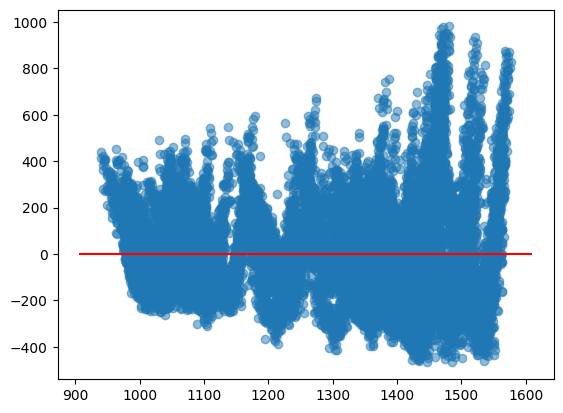

In [87]:
mod2 = smf.ols(formula='RT_Demand ~ C(Hr_End)+ Dry_Bulb', data=hourly_data_NH)

res2 = mod2.fit()
print(res2.summary())

# Residual plot

plt.scatter(res2.fittedvalues, res2.resid, alpha=0.5)
abline(0,0)

                            OLS Regression Results                            
Dep. Variable:              RT_Demand   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     892.2
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:01:28   Log-Likelihood:            -1.7579e+05
No. Observations:               26304   AIC:                         3.516e+05
Df Residuals:                   26278   BIC:                         3.518e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1017.7696      6.556    1

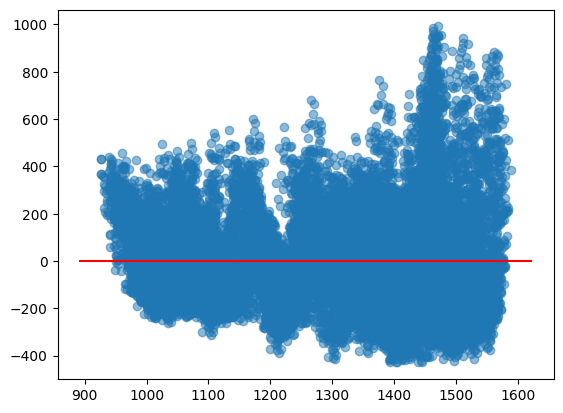

In [88]:
mod3 = smf.ols(formula='RT_Demand ~ C(Hr_End)+ Dry_Bulb+Dew_Point', data=hourly_data_NH)

res3 = mod3.fit()
print(res3.summary())

# Residual plot

plt.scatter(res3.fittedvalues, res3.resid, alpha=0.5)
abline(0,0)

                            OLS Regression Results                            
Dep. Variable:              RT_Demand   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     3476.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:01:29   Log-Likelihood:            -1.6427e+05
No. Observations:               26304   AIC:                         3.286e+05
Df Residuals:                   26277   BIC:                         3.288e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1739.5745      5.661  

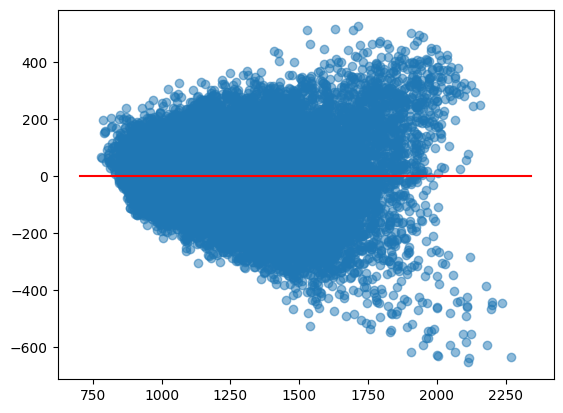

In [89]:
mod4 = smf.ols(formula='RT_Demand ~ C(Hr_End) + Dry_Bulb + Dew_Point + I(Dry_Bulb**2)', data=hourly_data_NH)

res4 = mod4.fit()
print(res4.summary())

# Residual plot

plt.scatter(res4.fittedvalues, res4.resid, alpha=0.5)
abline(0,0)

                            OLS Regression Results                            
Dep. Variable:              RT_Demand   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     3526.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:01:30   Log-Likelihood:            -1.6373e+05
No. Observations:               26304   AIC:                         3.275e+05
Df Residuals:                   26276   BIC:                         3.278e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1699.7571      5.67

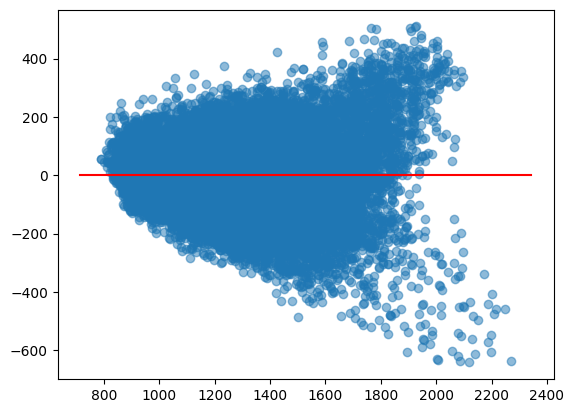

In [90]:
mod5 = smf.ols(formula='RT_Demand ~ C(Hr_End) + Dry_Bulb + Dew_Point + I(Dry_Bulb**2) + I(Dew_Point**2)', data=hourly_data_NH)

res5 = mod5.fit()
print(res5.summary())

# Residual plot

plt.scatter(res5.fittedvalues, res5.resid, alpha=0.5)
abline(0,0)

                            OLS Regression Results                            
Dep. Variable:              RT_Demand   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     3504.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:01:30   Log-Likelihood:            -1.6342e+05
No. Observations:               26304   AIC:                         3.269e+05
Df Residuals:                   26275   BIC:                         3.271e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1655.0510      5

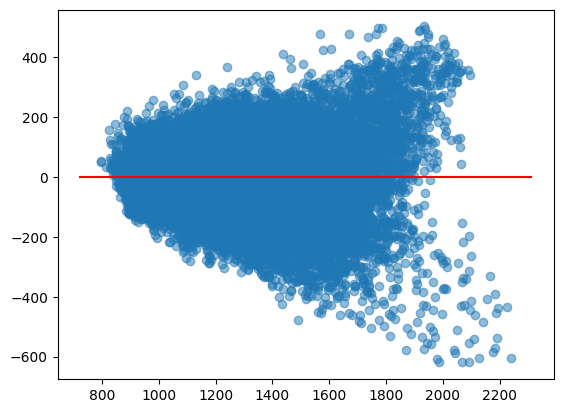

In [91]:
mod6 = smf.ols(formula='RT_Demand ~ C(Hr_End) + Dry_Bulb + Dew_Point + I(Dry_Bulb**2) + I(Dew_Point**2) + Dry_Bulb:Dew_Point', data=hourly_data_NH)

res6 = mod6.fit()
print(res6.summary())
table = sm.stats.anova_lm(res6, typ=1)
print(table)

# Residual plot

plt.scatter(res6.fittedvalues, res6.resid, alpha=0.5)
abline(0,0)

Creating Day of week Column for the Dataset

In [92]:
##Create day of week.

from datetime import date
import calendar
#loadf['DATE'].weekday()

hourly_data_NH['DAYOFWEEK'] = pd.to_datetime(hourly_data_NH['Date']).dt.day_name()
hourly_data_NH.head()

,Date,Hr_End,Dry_Bulb,Dew_Point,RT_Demand,DAYOFWEEK
0,2020-01-01,1,32,30,1080.184,Wednesday
1,2020-01-01,2,34,27,1034.726,Wednesday
2,2020-01-01,3,34,26,1005.343,Wednesday
3,2020-01-01,4,33,24,1000.609,Wednesday
4,2020-01-01,5,31,24,1011.067,Wednesday


<Axes: title={'center': 'RT_Demand'}, xlabel='[DAYOFWEEK]'>

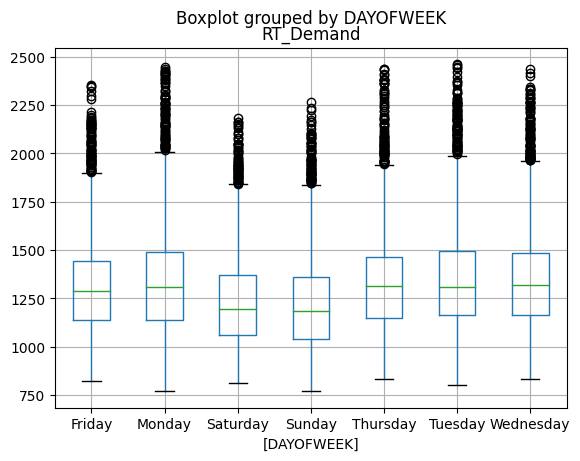

In [93]:
hourly_data_NH.boxplot(column=['RT_Demand'], by=['DAYOFWEEK'])

                            OLS Regression Results                            
Dep. Variable:              RT_Demand   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     3692.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:01:32   Log-Likelihood:            -1.6080e+05
No. Observations:               26304   AIC:                         3.217e+05
Df Residuals:                   26269   BIC:                         3.220e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

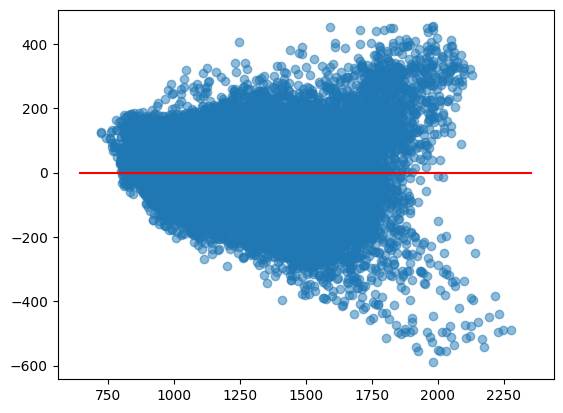

In [94]:
mod7 = smf.ols(formula='RT_Demand ~ C(Hr_End) + Dry_Bulb + Dew_Point + I(Dry_Bulb**2) + I(Dew_Point**2) + Dry_Bulb:Dew_Point + C(DAYOFWEEK)', data=hourly_data_NH)

res7 = mod7.fit()
print(res7.summary())
table = sm.stats.anova_lm(res7, typ=1)
print(table)

# Residual plot

plt.scatter(res7.fittedvalues, res7.resid, alpha=0.5)
abline(0,0)

                            OLS Regression Results                            
Dep. Variable:              RT_Demand   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     3144.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:01:33   Log-Likelihood:            -1.6078e+05
No. Observations:               26304   AIC:                         3.216e+05
Df Residuals:                   26263   BIC:                         3.220e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

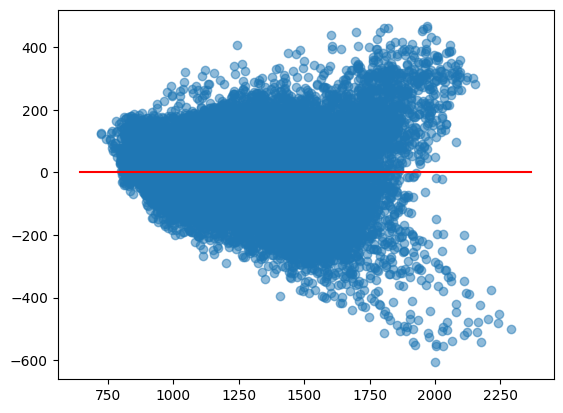

In [95]:
mod8 = smf.ols(formula='RT_Demand ~ C(Hr_End) + Dry_Bulb + Dew_Point + I(Dry_Bulb**2) + I(Dew_Point**2) + Dry_Bulb:Dew_Point + C(DAYOFWEEK) + Dry_Bulb:C(DAYOFWEEK)', data=hourly_data_NH)

res8 = mod8.fit()
print(res8.summary())
table = sm.stats.anova_lm(res8, typ=1)
print(table)

# Residual plot

plt.scatter(res8.fittedvalues, res8.resid, alpha=0.5)
abline(0,0)

                            OLS Regression Results                            
Dep. Variable:              RT_Demand   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     2793.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:01:34   Log-Likelihood:            -1.6054e+05
No. Observations:               26304   AIC:                         3.212e+05
Df Residuals:                   26257   BIC:                         3.216e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

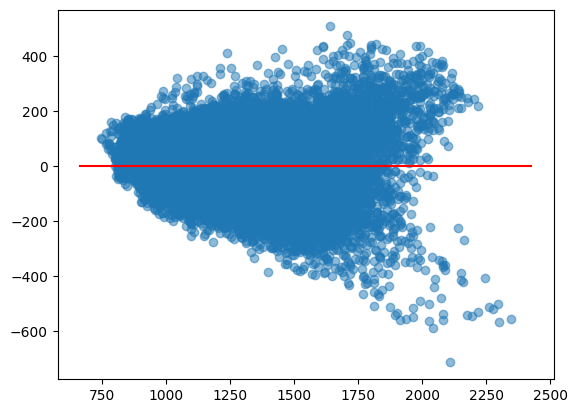

In [96]:
mod9 = smf.ols(formula='RT_Demand ~ C(Hr_End) + Dry_Bulb + Dew_Point + I(Dry_Bulb**2) + I(Dew_Point**2) + Dry_Bulb:Dew_Point + C(DAYOFWEEK) + Dry_Bulb:DAYOFWEEK + I(Dry_Bulb**2):DAYOFWEEK', data=hourly_data_NH)

res9 = mod9.fit()
print(res9.summary())
table = sm.stats.anova_lm(res9, typ=1)
print(table)

# Residual plot

plt.scatter(res9.fittedvalues, res9.resid, alpha=0.5)
abline(0,0)

                            OLS Regression Results                            
Dep. Variable:              RT_Demand   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     748.9
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:01:36   Log-Likelihood:            -1.5971e+05
No. Observations:               26304   AIC:                         3.198e+05
Df Residuals:                   26119   BIC:                         3.213e+05
Df Model:                         184                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

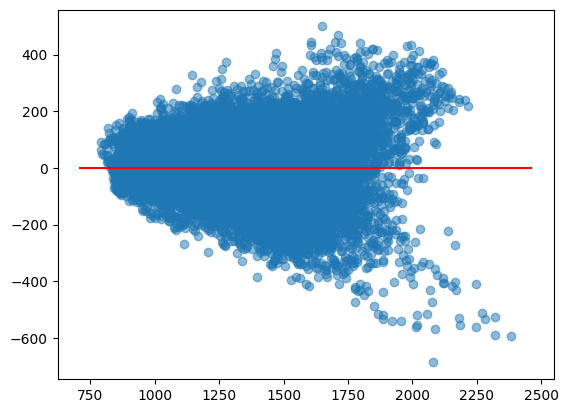

In [97]:
mod10 = smf.ols(formula='RT_Demand ~ C(Hr_End) + Dry_Bulb + Dew_Point + I(Dry_Bulb**2) + I(Dew_Point**2) + Dry_Bulb:Dew_Point + C(DAYOFWEEK) + Dry_Bulb:DAYOFWEEK + I(Dry_Bulb**2):DAYOFWEEK + C(DAYOFWEEK) : C(Hr_End)', data=hourly_data_NH)

res10 = mod10.fit()
print(res10.summary())
table = sm.stats.anova_lm(res10, typ=1)
print(table)

# Residual plot

plt.scatter(res10.fittedvalues, res10.resid, alpha=0.5)
abline(0,0)

In [98]:
hourly_data_NH ["Dry_Bulb_squared"] = hourly_data_NH ["Dry_Bulb"] ** 2
hourly_data_NH ["Dew_Point_squared"] = hourly_data_NH ["Dew_Point"] ** 2
hourly_data_NH ["Interactive_Term"] = hourly_data_NH ["Dry_Bulb"] * hourly_data_NH ["Dew_Point"]
#hourly_data_NH ["Interactive_Term_1"] = hourly_data_NH ["Dry_Bulb"] * hourly_data_NH["DAYOFWEEK"]

In [99]:
#day_of_week_dummies = pd.get_dummies(hourly_data_NH["DAYOFWEEK"], prefix="DayOfWeek")
#hourly_data_NH = pd.concat([hourly_data_NH, day_of_week_dummies], axis=1)
#hourly_data_NH["Interactive_Term_test"] = hourly_data_NH["Dry_Bulb"] * hourly_data_NH["DAYOFWEEK"]

#hourly_data_NH["Interactive_Term_test"] = hourly_data_NH["Dry_Bulb"] * hourly_data_NH["DAYOFWEEK"]

#from patsy import dmatrix

# Assuming hourly_data_NH is your DataFrame
#hourly_data_NH["Interactive_Term_test"] = hourly_data_NH["Dry_Bulb"] * dmatrix("C(DAYOFWEEK)", hourly_data_NH)

In [100]:
hourly_data_NH = pd.get_dummies(hourly_data_NH, columns = ['Hr_End', 'DAYOFWEEK'], drop_first = True) # Treating 'Hr_End' and 'DAYOFWEEK' as categorical variables
hourly_data_NH.head(3)


,Date,Dry_Bulb,Dew_Point,RT_Demand,Dry_Bulb_squared,Dew_Point_squared,Interactive_Term,Hr_End_2,Hr_End_3,Hr_End_4,...,Hr_End_21,Hr_End_22,Hr_End_23,Hr_End_24,DAYOFWEEK_Monday,DAYOFWEEK_Saturday,DAYOFWEEK_Sunday,DAYOFWEEK_Thursday,DAYOFWEEK_Tuesday,DAYOFWEEK_Wednesday
0,2020-01-01,32,30,1080.184,1024,900,960,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2020-01-01,34,27,1034.726,1156,729,918,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2020-01-01,34,26,1005.343,1156,676,884,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [101]:
hourly_data_NH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 26304 non-null  datetime64[ns]
 1   Dry_Bulb             26304 non-null  int64         
 2   Dew_Point            26304 non-null  int64         
 3   RT_Demand            26304 non-null  float64       
 4   Dry_Bulb_squared     26304 non-null  int64         
 5   Dew_Point_squared    26304 non-null  int64         
 6   Interactive_Term     26304 non-null  int64         
 7   Hr_End_2             26304 non-null  uint8         
 8   Hr_End_3             26304 non-null  uint8         
 9   Hr_End_4             26304 non-null  uint8         
 10  Hr_End_5             26304 non-null  uint8         
 11  Hr_End_6             26304 non-null  uint8         
 12  Hr_End_7             26304 non-null  uint8         
 13  Hr_End_8             26304 non-

There are 34 columns in the dataframe, so k = 34.

## Step wise model selection - Forward selection

In [102]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [105]:
#Initialization variables

Y = hourly_data_NH.RT_Demand
X = hourly_data_NH.drop(columns = ['RT_Demand', 'Date'], axis = 1)
#X["Dry_Bulb_squared"] = X["Dry_Bulb"] ** 2
#X["Dew_Point_squared"] = X["Dew_Point"] ** 2
#X["Interactive_Term"] = X["Dry_Bulb"] * X["Dew_Point"]
#X["Interactive_Term_1"] = X["Dry_Bulb"]* X["DAYOFWEEK"]
k = 34


remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf

    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1]
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)

    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [106]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,5)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['Dry_Bulb_squared'], 1555868963),
 (2, ['Dry_Bulb_squared', 'Dry_Bulb'], 1043767761),
 (3, ['Dry_Bulb_squared', 'Dry_Bulb', 'Hr_End_4'], 970252519),
 (4, ['Dry_Bulb_squared', 'Dry_Bulb', 'Hr_End_4', 'Hr_End_3'], 890944096)]

In [107]:
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')

In [108]:
df1['numb_features'] = df1.index

In [109]:
#Initializing useful variables
m = len(Y)
p = 34
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[Dry_Bulb_squared],1.555869e+09,0.143264,1,59150.429256,4.943950,4.944261,0.143231
2,"[Dry_Bulb_squared, Dry_Bulb]",1.043768e+09,0.425251,2,39682.771360,3.316792,3.317413,0.425208
3,"[Dry_Bulb_squared, Dry_Bulb, Hr_End_4]",9.702525e+08,0.465732,3,36888.849747,3.083268,3.084201,0.465671
4,"[Dry_Bulb_squared, Dry_Bulb, Hr_End_4, Hr_End_3]",8.909441e+08,0.509403,4,33874.688617,2.831337,2.832580,0.509329
5,"[Dry_Bulb_squared, Dry_Bulb, Hr_End_4, Hr_End_...",8.153461e+08,0.551031,5,31001.588243,2.591195,2.592750,0.550946
6,"[Dry_Bulb_squared, Dry_Bulb, Hr_End_4, Hr_End_...",7.312547e+08,0.597336,6,27805.590556,2.324065,2.325931,0.597244
7,"[Dry_Bulb_squared, Dry_Bulb, Hr_End_4, Hr_End_...",6.754010e+08,0.628092,7,25683.109939,2.146663,2.148839,0.627993
8,"[Dry_Bulb_squared, Dry_Bulb, Hr_End_4, Hr_End_...",6.300334e+08,0.653073,8,23959.278672,2.002580,2.005067,0.652968
9,"[Dry_Bulb_squared, Dry_Bulb, Hr_End_4, Hr_End_...",5.993014e+08,0.669996,9,22791.848962,1.905003,1.907801,0.669883
10,"[Dry_Bulb_squared, Dry_Bulb, Hr_End_4, Hr_End_...",5.614419e+08,0.690843,10,21353.452179,1.784778,1.787887,0.690725


In [110]:
df1['R_squared_adj'].idxmax()
df1['R_squared_adj'].max()

0.8267140965322483

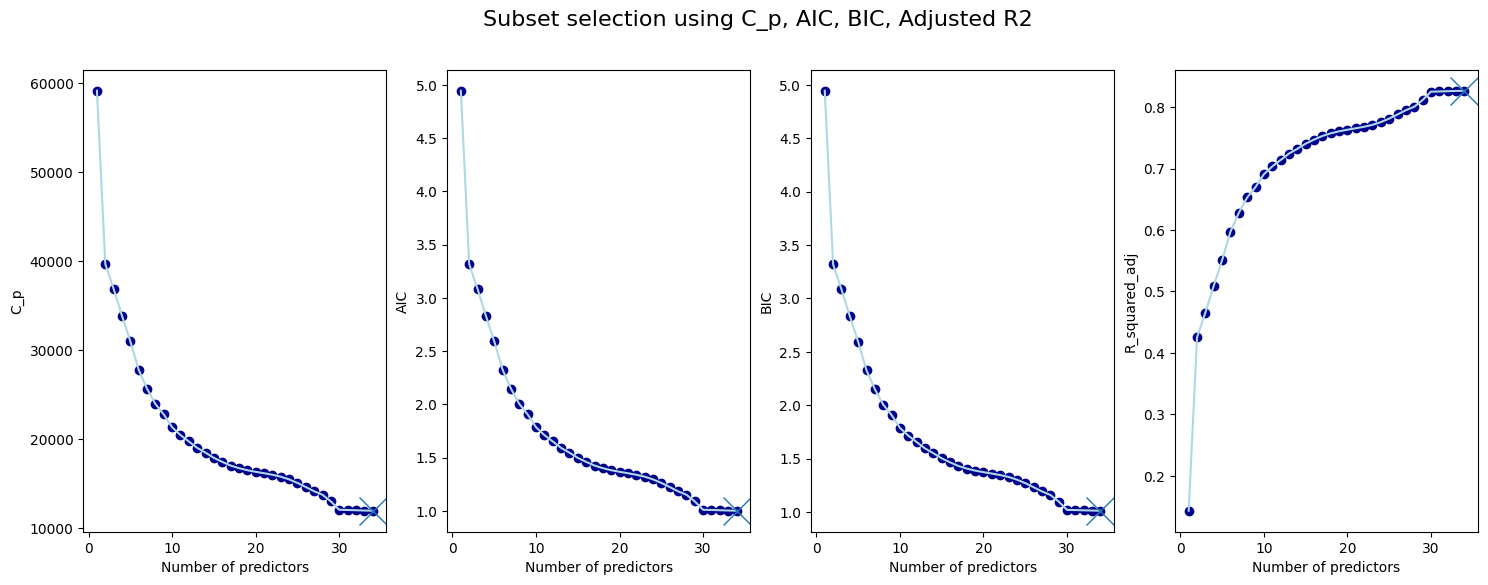

In [111]:
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()

'Dry_Bulb_squared','Dry_Bulb',

'Hr_End_4','Hr_End_3','Hr_End_5','Hr_End_2','Hr_End_6','Hr_End_24','Hr_End_7','Hr_End_23','Hr_End_19','Hr_End_18''Hr_End_20','Hr_End_17','Hr_End_21','Hr_End_16','Hr_End_14','Hr_End_15','Hr_End_13','Hr_End_12','Hr_End_11','Hr_End_10','Hr_End_9','Hr_End_22','Hr_End_8'

'DAYOFWEEK_Sunday','DAYOFWEEK_Saturday','DAYOFWEEK_Wednesday','DAYOFWEEK_Tuesday','DAYOFWEEK_Thursday','DAYOFWEEK_Monday'

'Interactive_Term',

'Dew_Point','Dew_Point_squared' - with all these 34 features are considered as best model for the data.


In [112]:
# filtering the training and test data
training_data = hourly_data_NH[hourly_data_NH["Date"] < '2022-12-1']
testing_data = hourly_data_NH[(hourly_data_NH["Date"] >= '2022-12-1')]

In [113]:
# Defining the feature matrix and target variable

X_train = training_data[['Dry_Bulb_squared','Dry_Bulb','Hr_End_4','Hr_End_3','Hr_End_5','Hr_End_2','Hr_End_6','Hr_End_24','DAYOFWEEK_Sunday','DAYOFWEEK_Saturday','Hr_End_7','Hr_End_23','Interactive_Term','Hr_End_19','Hr_End_18','Dew_Point','Hr_End_20','Hr_End_17','Dew_Point_squared','Hr_End_21','Hr_End_16','Hr_End_14','Hr_End_15','Hr_End_13','Hr_End_12','Hr_End_11','Hr_End_10','Hr_End_9','Hr_End_22','Hr_End_8','DAYOFWEEK_Wednesday','DAYOFWEEK_Tuesday','DAYOFWEEK_Thursday','DAYOFWEEK_Monday']]
y_train = training_data['RT_Demand']

X_test = testing_data[['Dry_Bulb_squared','Dry_Bulb','Hr_End_4','Hr_End_3','Hr_End_5','Hr_End_2','Hr_End_6','Hr_End_24','DAYOFWEEK_Sunday','DAYOFWEEK_Saturday','Hr_End_7','Hr_End_23','Interactive_Term','Hr_End_19','Hr_End_18','Dew_Point','Hr_End_20','Hr_End_17','Dew_Point_squared','Hr_End_21','Hr_End_16','Hr_End_14','Hr_End_15','Hr_End_13','Hr_End_12','Hr_End_11','Hr_End_10','Hr_End_9','Hr_End_22','Hr_End_8','DAYOFWEEK_Wednesday','DAYOFWEEK_Tuesday','DAYOFWEEK_Thursday','DAYOFWEEK_Monday']]
y_test = testing_data['RT_Demand']

In [114]:
# create a linear regression model and train with X_train and y_train
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [115]:
# Predicting model
lr_predictions = lr_model.predict(X_test)
lr_predictions

array([ 976.87947738,  943.52781084,  932.10778307,  936.33023054,
        960.42327326, 1036.45991035, 1163.59984577, 1237.83366696,
       1309.61837766, 1313.1210695 , 1315.38262012, 1326.26723361,
       1339.44959004, 1345.36358501, 1340.77582668, 1365.244847  ,
       1402.82182794, 1449.74508451, 1459.3081856 , 1441.43319767,
       1380.40758719, 1363.10710551, 1184.95235386, 1111.18690244,
       1007.65815498, 1050.00357044, 1067.71522607, 1037.71095482,
       1045.50765586, 1164.74076066, 1283.01630072, 1357.16801425,
       1356.44003731, 1337.62821599, 1320.96004775, 1296.99191483,
       1291.22300584, 1286.2835423 , 1275.68855768, 1303.87916643,
       1349.92341222, 1416.16119526, 1443.97389888, 1426.01187317,
       1396.55190217, 1332.48391913, 1222.7027966 , 1093.68001911,
        906.85947805,  876.20682035,  840.00492788,  829.43081374,
        852.38299091,  912.5088717 , 1008.55447317, 1090.23673463,
       1148.59691995, 1188.6448959 , 1208.04361172, 1222.03811

In [116]:
mse = mean_squared_error(y_test, lr_predictions)
rmse = np.sqrt(mse)
print("Mean Squared Error(MSE) =", mse)
print("Root Mean Squared Error =", rmse)

Mean Squared Error(MSE) = 11663.605360351292
Root Mean Squared Error = 107.99817294913508


In [117]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, lr_predictions)
r2

0.654714560140025

In [118]:
# Random Forest Classifier
rf_model = RandomForestRegressor(n_estimators =100, random_state= 123)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [119]:
rf_predictions = rf_model.predict(X_test)
rf_predictions

array([ 990.07972   ,  927.42761   ,  977.64537   ,  971.67210717,
       1003.91137333, 1153.74552667, 1259.660365  , 1344.212016  ,
       1419.262095  , 1385.42959933, 1351.42435   , 1375.94591   ,
       1393.04875   , 1438.78493   , 1421.55725417, 1452.8616841 ,
       1546.77187   , 1574.99045   , 1547.72341667, 1491.64614   ,
       1365.57882667, 1325.56635   , 1200.38788   , 1161.64531   ,
       1093.7793125 , 1032.945315  , 1053.06006   , 1057.57097567,
       1106.56206471, 1200.90465833, 1344.77037   , 1430.48414   ,
       1473.48513667, 1428.41023467, 1402.5352    , 1352.89871   ,
       1327.41164   , 1346.83759   , 1388.44391333, 1449.09842   ,
       1501.57228   , 1550.16153   , 1543.80802267, 1498.80746   ,
       1433.862081  , 1407.51944   , 1215.82742467, 1082.72981333,
       1039.9049425 , 1009.026233  ,  966.13315   ,  910.363812  ,
        919.10476   ,  942.07510067, 1033.89855333, 1033.61124   ,
       1118.77351   , 1181.420127  , 1232.1218235 , 1295.41934

In [120]:
mse = mean_squared_error(y_test, rf_predictions)
rmse = np.sqrt(mse)
print("Mean Squared Error(MSE) =", mse)
print("Root Mean Squared Error =", rmse)

Mean Squared Error(MSE) = 6426.511885828212
Root Mean Squared Error = 80.1655280393525
